# Credit Card Customer Segmentation - Targeted Marketing Ad Campaign

By: Katrina James, Christian Urday, Justin Kerry

## Introductory Statement

Banks often use many different tactics to define their data and allow a deeper understanding of the data for realistic and accurate decision making. One of these tactics that many people are familiar with is called Customer Segmentation.


<b>Customer Segmentation</b>, also known by many as <i>Market Segmentation</i>, is the process of dividing a heterogeneous market into relatively more homogeneous segments based on certain parameters involving human behaviour and trends. This process is crucial for maximizing marketing campaign conversion rates. It is a process that is not only used in commerical business cases, but also a process that is used by banks as stated earlier. One of the ways that banks can utilize customer segmentation is when they are analyzing their credit card customers. They can segment their credit card customers into a few different groups to develop a better understanding regarding the traits and patterns of these credit card customers. 

## Background

Through the process of customer segmentation, banks divide credit card customers into a few different groups:

- <b>Transactors</b>: customers who pay the least amount of interest charges and are more financially cautious.

- <b>Revolvers</b>: customers who use their credit card as a loan. This group is the most lucrative sector for banks since they usually pay 20%+ interest.

- <b>VIP/Prime</b>: customers with high credit limit and percentage of full payment. They can be targeted to increase their credit limit/spending.

- <b>New Customers</b>: customers with low tenure who can be targeted for alternative bank services enrollment.

## Objective

We will be using an unsupervised machine learning algorithm (K-Means) to segment the credit card customers featured in our dataset into different groups as clusters. We will then use the Principal Components Analysis (PCA) for dimension reduction to provide us with a simplified overview of our data without significant loss of accuracy.

In order to provide the theoretical bank marketing team with a successful targeted marketing ad campaign that is effectively tailored to specific groups of customers, we will need to divide these customers into at least 3 distinctive groups. This means that we will need at least 3 clusters or components in our machine learning model.

## Dataset Analysis

We will be using a sample dataset for customer segmentation that can be found at the following weblink: https://www.kaggle.com/arjunbhasin2013/ccdata

Now we will take a look at the dataset as a dataframe table for initial analysis.

First we will import all of the libraries that we will need and then we can read our dataset as a viewable dataframe table.

In [33]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True, grid=False)

In [34]:
df=pd.read_csv('Bank_marketing.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


This sample dataset contains the usage behaviour of just under 9000 active credit card holders during the last 6 months. The data is at a customer level with 18 attributes for each object in the dataset.

Let us take a look at each attribute alongside an explanation in order to see what exactly each attribute tells us about each object:

- <b>CUST_ID</b>: identification of Credit Card holder <i>(categorical)</i>.

- <b>BALANCE</b>: balance amount left in their account to make purchases <i>(numerical)</i>.

- <b>BALANCE_FREQUENCY</b>: range of how often balance is updated <i>(1 = often, 0 = not often)</i>.

- <b>PURCHASES</b>: amount of purchases made from account <i>(numerical)</i>.

- <b>ONEOFF_PURCHASES</b>: maximum purchase amount done in a single purchase <i>(numerical)</i>.

- <b>INSTALLMENTS_PURCHASES</b>: amount of purchase done in an installment <i>(numerical)</i>.

- <b>CASH_ADVANCE</b>: cash advance given by the user <i>(numerical)</i>.

- <b>PURCHASES_FREQUENCY</b>: range of how frequently purchases are being made <i>(1 = often, 0 = not often)</i>.

- <b>ONEOFF_PURCHASES_FREQUENCY</b>: range of how often purchases are happening in a single installment <i>(1 = often, 0 = not often)</i>.

- <b>PURCHASES_INSTALLMENTS_FREQUENCY</b>: range of how often purchases in installments are occuring <i>(1 = often, 0 = not often)</i>.

- <b>CASH_ADVANCE_FREQUENCY</b>: range of how often the cash is being paid in advance <i>(1 = often, 0 = not often)</i>.

- <b>CASH_ADVANCE_TRX</b>: number of transactions made with "Cash in Advance" <i>(numerical)</i>.

- <b>PURCHASES_TRX</b>: number of purchase transactions made <i>(numerical)</i>.

- <b>CREDIT_LIMIT</b>: limit of credit for a customer's credit card <i>(numerical)</i>.

- <b>PAYMENTS</b>: amount of payments done by credit card user <i>(numerical)</i>.

- <b>MINIMUM_PAYMENTS</b>: minimum amount of payments made by the user <i>(numerical)</i>.

- <b>PRC_FULL_PAYMENT</b>: percentage of full payment paid by user <i>(numerical percentage)</i>.

- <b>TENURE</b>: tenure of credit card service for user in years <i>(numerical)</i>.

--

Now that we can visualize our dataset and we have a better understanding of the attributes for each object, we can proceed with data preprocessing.

## Data Preprocessing

Since we are beginning to preprocess our data, let us gather some information about the dataset such as <i>non-null count</i> and <i>data types</i>.

This will give us an idea on any missing data as well as which types of data we are going to be dealing with when building our model later on.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

--

We can see that we have some missing data for <i>MINIMUM_PAYMENTS</i> and <i>CREDIT_LIMIT</i>.

This could've happened through human error or possible a customer refusing to disclose that information.

Regardless, we will have to fill in these missing data values since they are crucial for our model to achieve a higher accuracy when segmentating each object.

--

First let us use the .describe() function in python to acquire some statistical insights on our dataframe.

In [36]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


--

We now have an understanding of the important statistics regarding our data. We can see the min values, the max values, and the mean which can be used to fill in the missing data.

We can also see the count for the two attributes that do not equal 8950, which is our missing data values. Let us address this missing data now

### Missing Data

Here is a heatmap plot from our seaborn library that will show us our missing data values. We will use this plot twice. Once for confirming that the data values are missing. A second time for confirming that the missing data values have been filled.

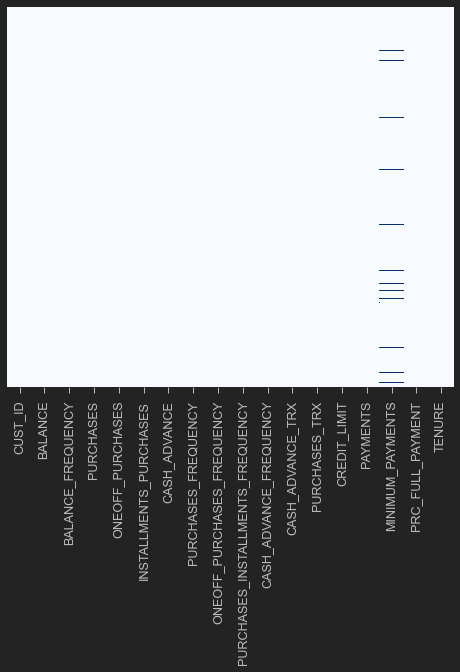

In [37]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="Blues")

We can see the missing data values in our dataset in the above plot.

--

Let us check to see exactly how many values are missing.

In [38]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

--

We can see that there are 313 missing values for <i>MINIMUM_PAYMENTS</i>.

We can see that there is 1 missing value for <i>CREDIT_LIMIT</i>.

--

Let us use the mean of <i>MINIMUM_PAYMENTS</i> to fill in the 313 missing values for that attribute.

In [39]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

Now let us check to see if the 313 missing values for <i>MINIMUM_PAYMENTS</i> has been filled with the mean of the attribute.

In [40]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

--

We can do the same for the missing value of the <i>CREDIT_LIMIT</i> attribute.

In [41]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

Our second heatmap will show us that there are no more missing values in our dataset.

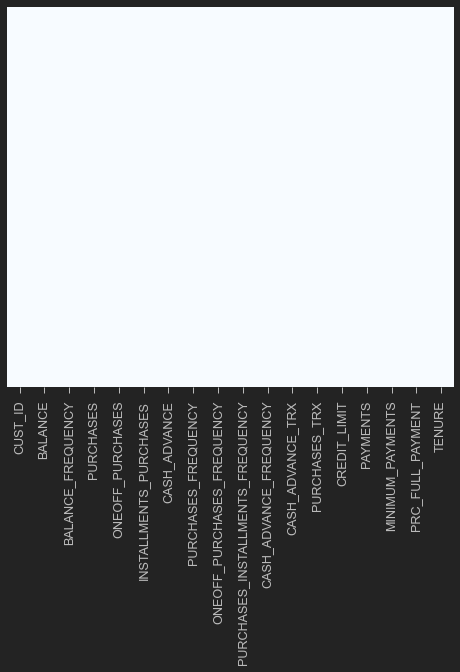

In [42]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap="Blues")

This can be proven by using a final sum for isnull.

In [43]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

We can clearly see that there is no more missing data in the dataset.

### Checking for Duplicate Data

Let us use a sum function to check for duplicated data.

In [44]:
df.duplicated().sum()

0

We can see that there is no duplicated data.

### Dropping Unneccessary Variables

After looking over each of the attributes in the dataset, we can see that there is one attribute that is unneccessary and may actually contribute to some noise in our model.

This attribute is customer ID (CUST_ID). Let us drop that attribute so we can have a cleaner dataset.

In [45]:
df.drop('CUST_ID',axis=1,inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Perfect. The CUST_ID column that was not providing us with any valuable information is now eliminated.

## Feature Plotting

Let us plot each feature to visualize the probability density of each variable being continuous.

<i>Sidenote: we will see some future error messages displayed, but they will not interfere with our data or our feature plots so they can be safely disregarded</i>.

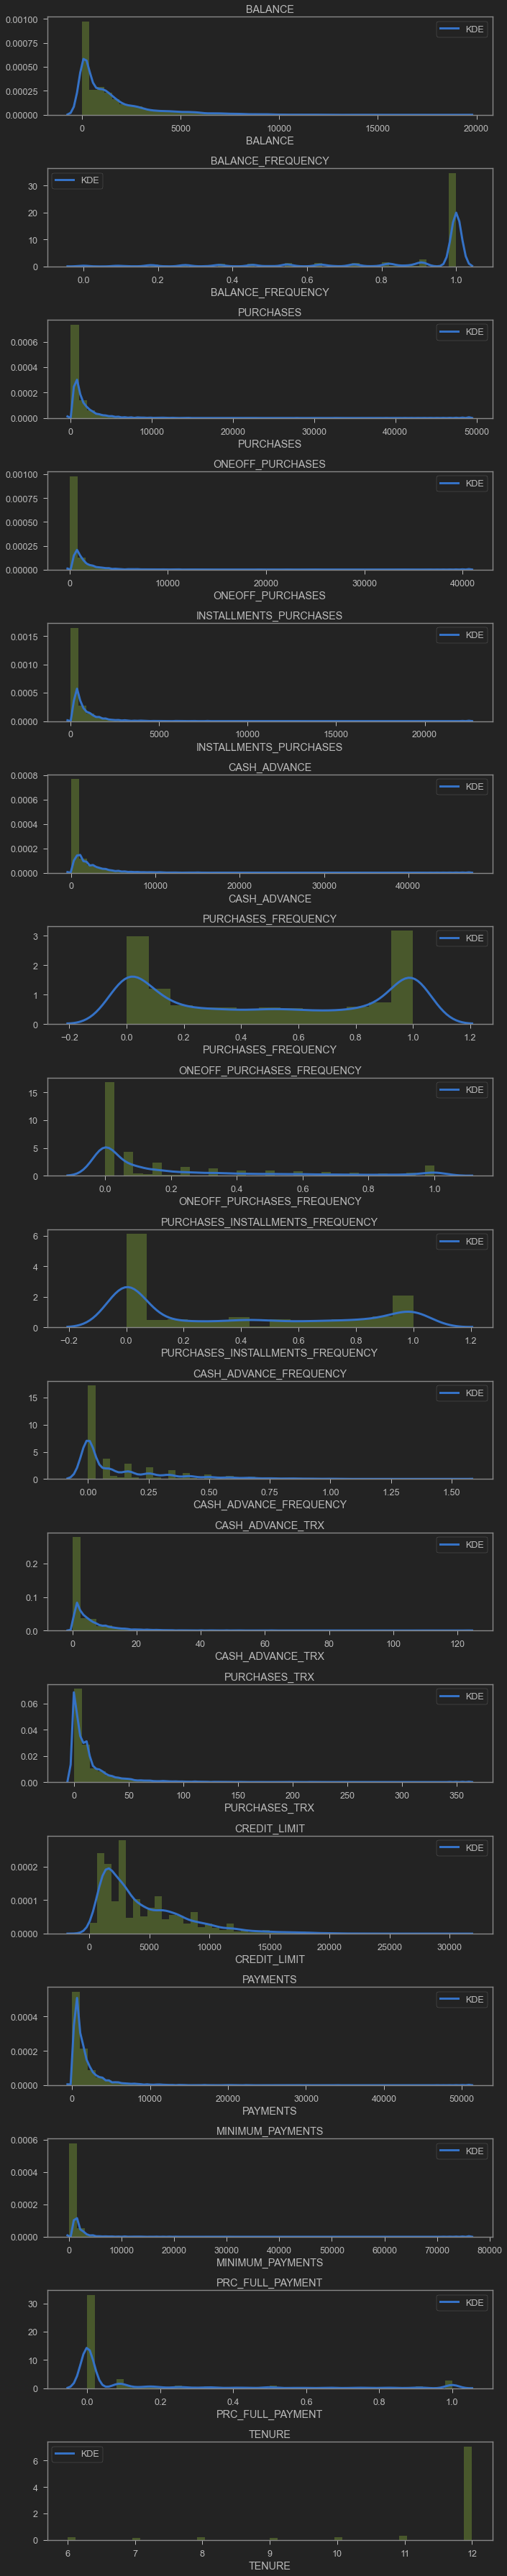

In [46]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color":"b","lw":3,"label":"KDE"}, hist_kws={"color":"g"})
    plt.title(df.columns[i])

plt.tight_layout()

--

We can also use a Correlation Matrix to visualize the level of correlation between the features. This matrix will also display a level bar on the right side to show how correlated each feature is with each other.

<i>Sidenote: 1 can be considered the most correlated and -0.32 can be considered the least correlated</i>.

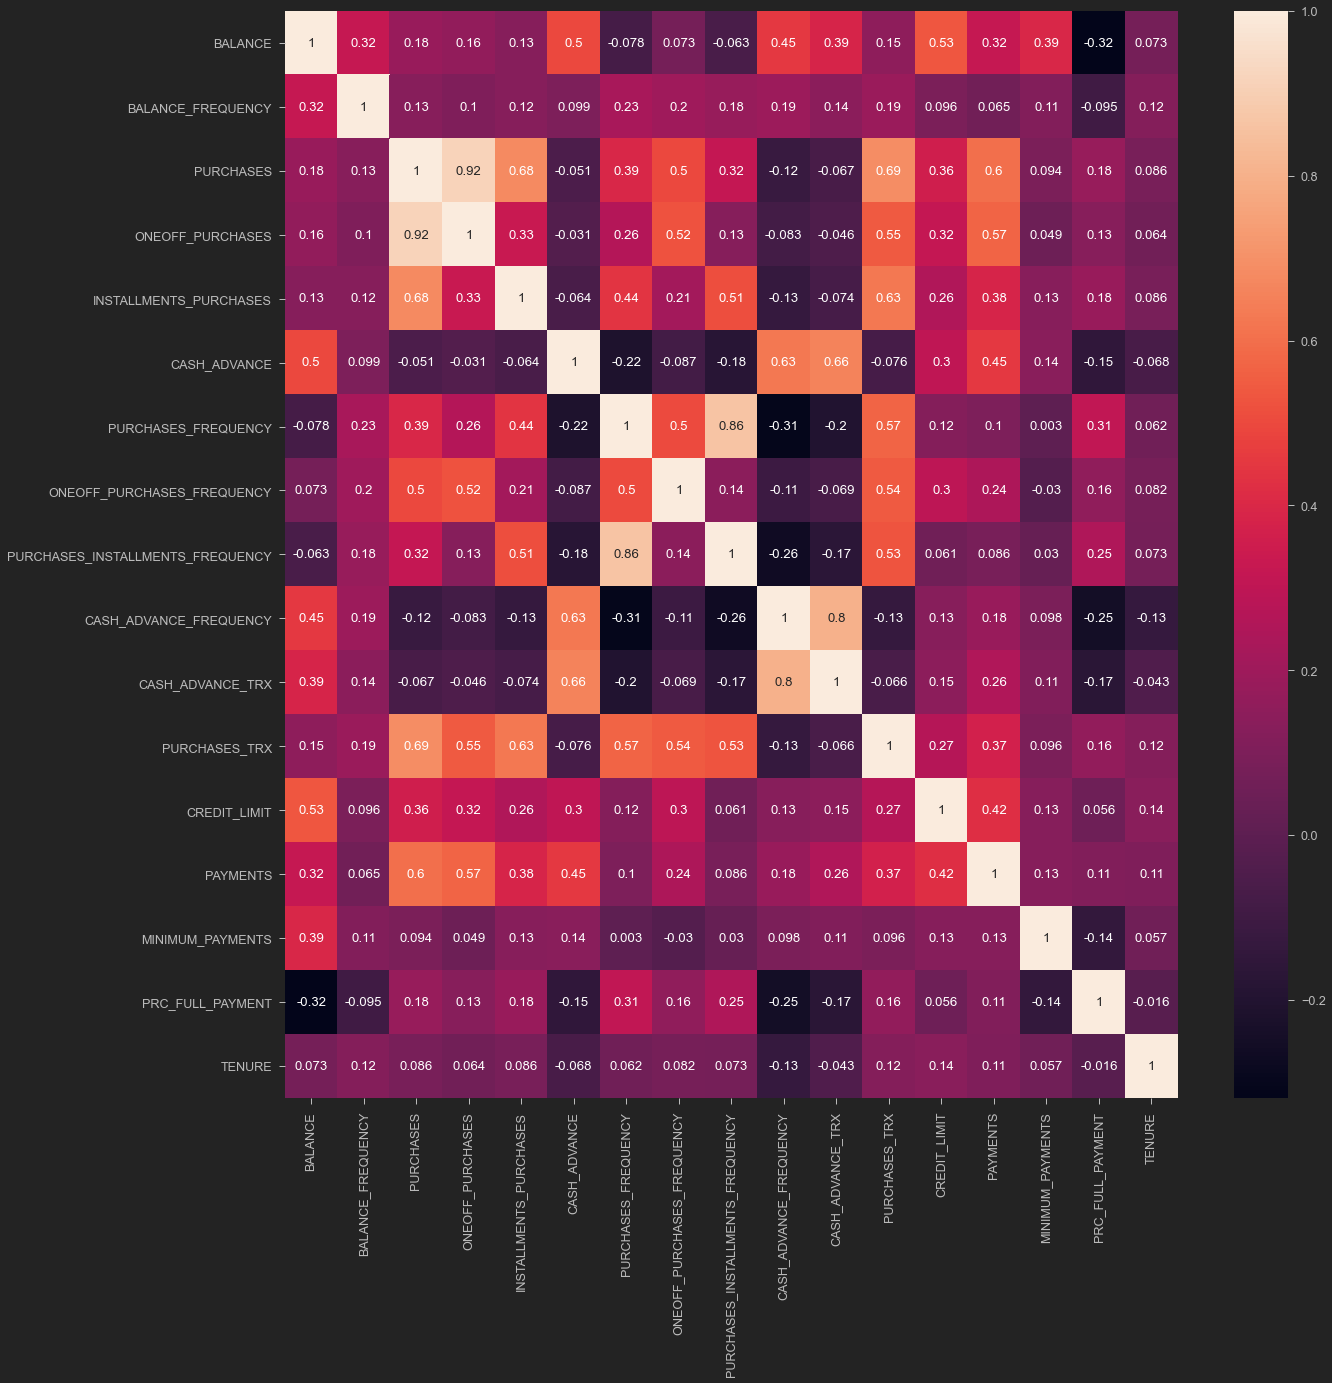

In [47]:
correlation=df.corr()
f, ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True)

--

We are almost ready to use the K-Means Clustering algorithm. First we must scale and transform the data appropriately. We must also determine the optimal amount of clusters for the K-Means algorithm.

## Scaling the Data

We can scale our data using the Standard Scaler in python.

In [48]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

--

Let us confirm the correct number of objects and attributes in our dataset before we continue.

In [49]:
df_scaled.shape

(8950, 17)

## Determining Optimal Number of Clusters

In order to determine the optimal number of clusters for our K-Means algorithm, we will use the elbow method.

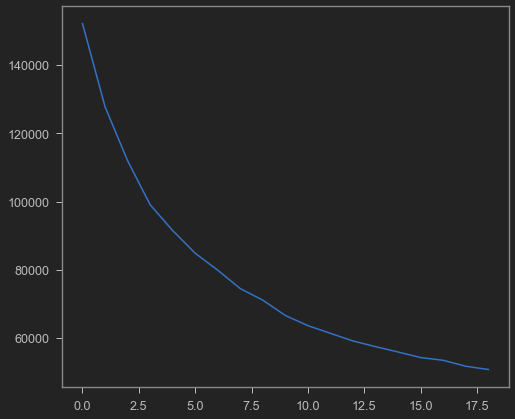

In [50]:
scores=[]
range_val=range(1,20)
for i in range_val:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    scores.append(kmeans.inertia_)
plt.plot(scores,'bx-')

Based on this plot, we can see that the Elbow forms around the 3rd or 4th cluster.

Since the elbow is non-definitive and the linearity of the graph does not present itself until the 7th or 8th cluster, we will choose 7 clusters for our K-Means algorithm.

## Application of K-Means Method

Now we can start applying the K-Means method as a process for our model construction using the selected parameters.

In [51]:
kmeans=KMeans(7)
kmeans.fit(df_scaled)
labels=kmeans.labels_

kmeans.cluster_centers_.shape

(7, 17)

--

We have now applied K-Means to our scaled dataset.

Let us now view the scaled dataset as a dataframe post K-Means application.

<i>Sidenote: We will not actually see the clusters listed in our dataframe until after we concatenate the dataset with the clusters labels. We will do that very shortly</i>.

In [52]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.006714,0.372181,-0.362254,-0.244993,-0.406365,-0.072579,-0.875371,-0.402459,-0.773589,0.148050,-0.017913,-0.490576,-0.338051,-0.265417,-0.025292,-0.454579,-0.006917
1,-0.394168,0.307855,-0.066367,-0.257370,0.315865,-0.360633,0.974666,-0.413763,1.168912,-0.459237,-0.356183,0.133916,-0.323701,-0.245907,-0.071866,0.350143,-0.021670
2,-0.130953,0.394590,0.521421,0.644539,0.048613,-0.330526,0.956858,1.835361,0.179352,-0.406252,-0.328690,0.597164,0.416108,0.124104,-0.158577,0.405619,0.192166
3,1.051721,0.462860,2.438627,1.746479,2.557473,-0.150228,1.166533,1.508952,1.279958,-0.275963,-0.146860,3.044940,1.277434,1.427045,0.736572,0.228664,0.338404
4,1.601878,0.375271,-0.226740,-0.160760,-0.240850,1.955012,-0.483724,-0.209963,-0.431080,1.908057,1.852998,-0.280078,0.971746,0.747706,0.485441,-0.392515,-0.090828
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,-0.698229,-2.132395,-0.318238,-0.236661,-0.317581,-0.306524,-0.567315,-0.433735,-0.462734,-0.483149,-0.358074,-0.428114,-0.215265,-0.223704,-0.255581,0.250288,-0.163367


--

Before we concatenate the clusters labels to the dataframe, we need to apply an inverse transformation to understand the differentiation between the numerical values.

### Transformations

Let us apply the inverse transformation to the dataframe now.

In [53]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1550.500147,0.965437,229.242971,185.798923,43.597009,826.670138,0.139022,0.082396,0.056993,0.164771,3.126587,2.515952,3264.482561,964.788641,805.264831,0.020758,11.508062
1,744.047684,0.950199,861.410151,165.256184,696.700591,222.606549,0.881531,0.079024,0.828993,0.043246,0.818140,18.038479,3316.691884,1021.266647,696.726791,0.256125,11.488319
2,1291.906380,0.970745,2117.228198,1662.240691,455.027835,285.742782,0.874384,0.749982,0.435716,0.053849,1.005761,29.553086,6008.419005,2092.413466,494.650353,0.272351,11.774486
3,3753.542597,0.986918,6213.368455,3491.235583,2723.758889,663.835579,0.958537,0.652607,0.873126,0.079921,2.246612,90.395664,9142.276423,5864.300560,2580.756718,0.220595,11.970190
4,4898.649474,0.966169,518.770783,325.607968,193.270402,5078.621920,0.296209,0.139822,0.193115,0.516966,15.894180,7.748148,8030.057720,3897.680488,1995.506092,0.038911,11.395767
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,111.170530,0.372126,323.283526,199.628938,123.883072,336.076447,0.262660,0.073066,0.180535,0.038461,0.805235,4.068514,3711.227016,1085.543450,268.586773,0.226920,11.298691


--

Now we are ready to concatenate the clusters labels with our original dataframe.

In [54]:
df_cluster=pd.concat([df,pd.DataFrame({'CLUSTER':labels})], axis=1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


--

Now that clusters labels have been concatenated with original dataframe, we can apply Principal Components Analysis to reduce our dimensions and allow our unsupervised machine learning model to transition to a more simplified overview without a significant loss in accuracy.

Right before we do that we will plot the clusters as a histogram matrix to visualize each of the clusters against each of the attributes featured in our dataframe.

<i>Sidenote: python will list these clusters as 0-6 which is the same as listing them as clusters 1-7 since we do have 7 clusters derived from K-Means.

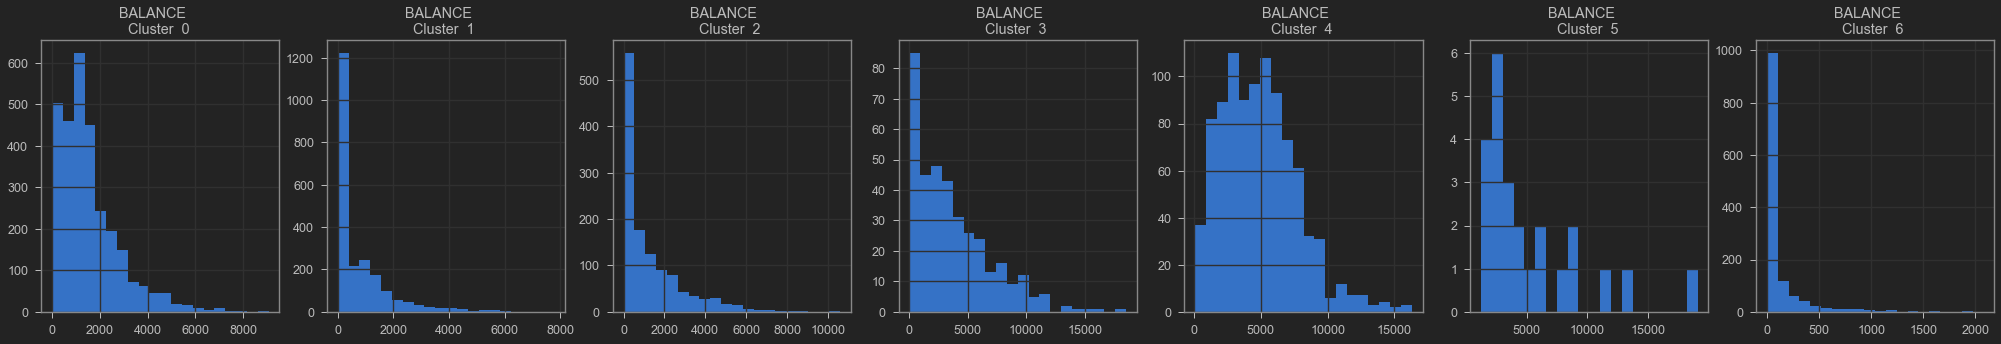

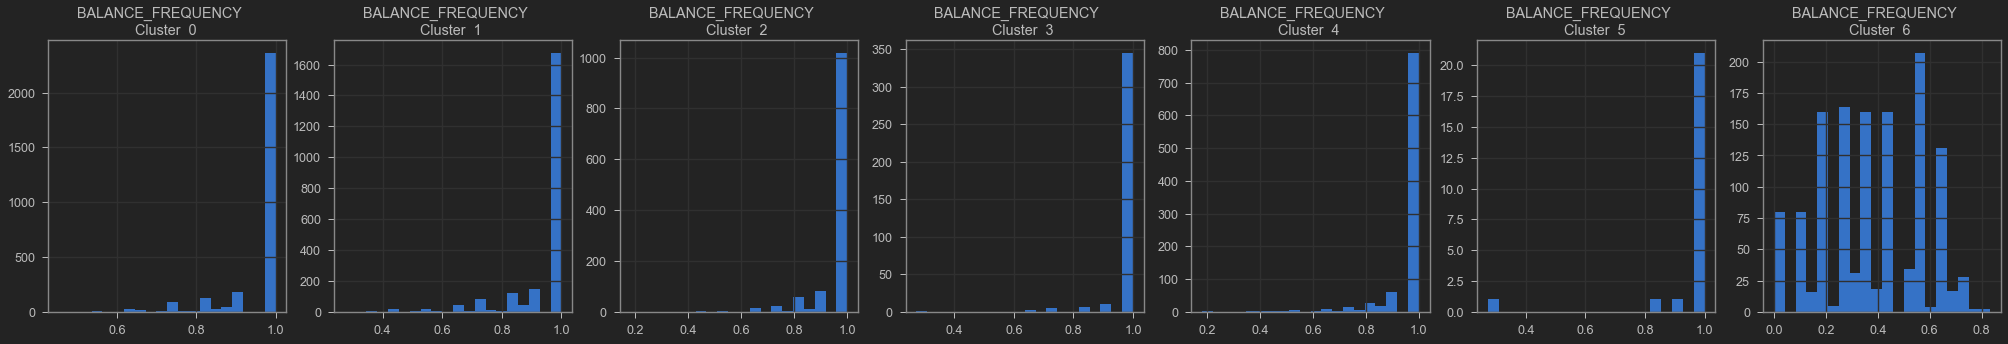

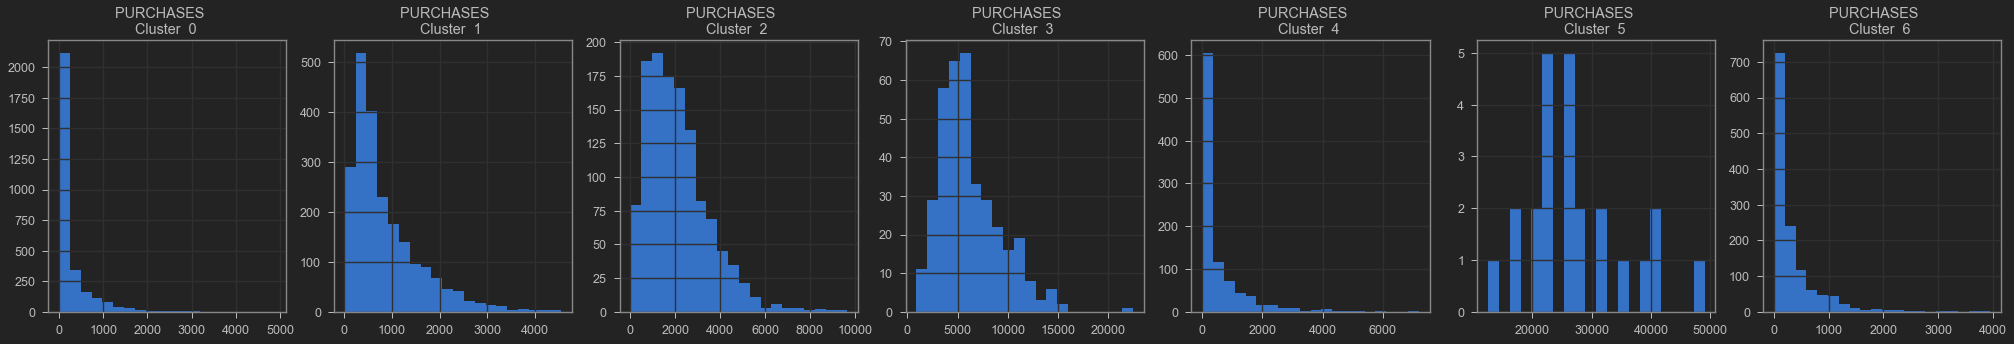

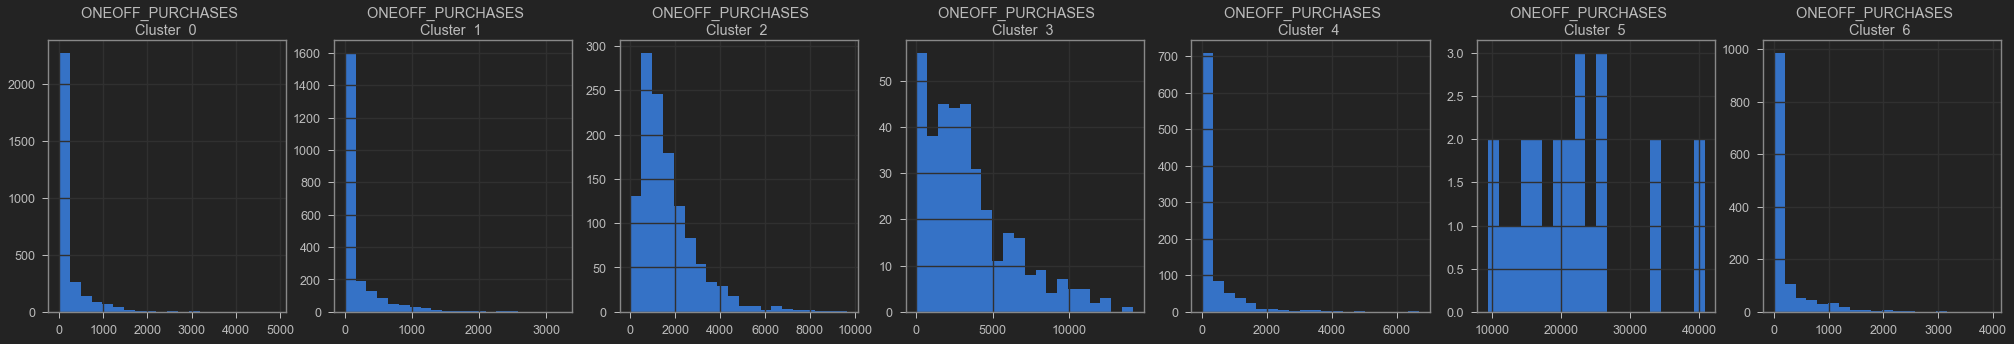

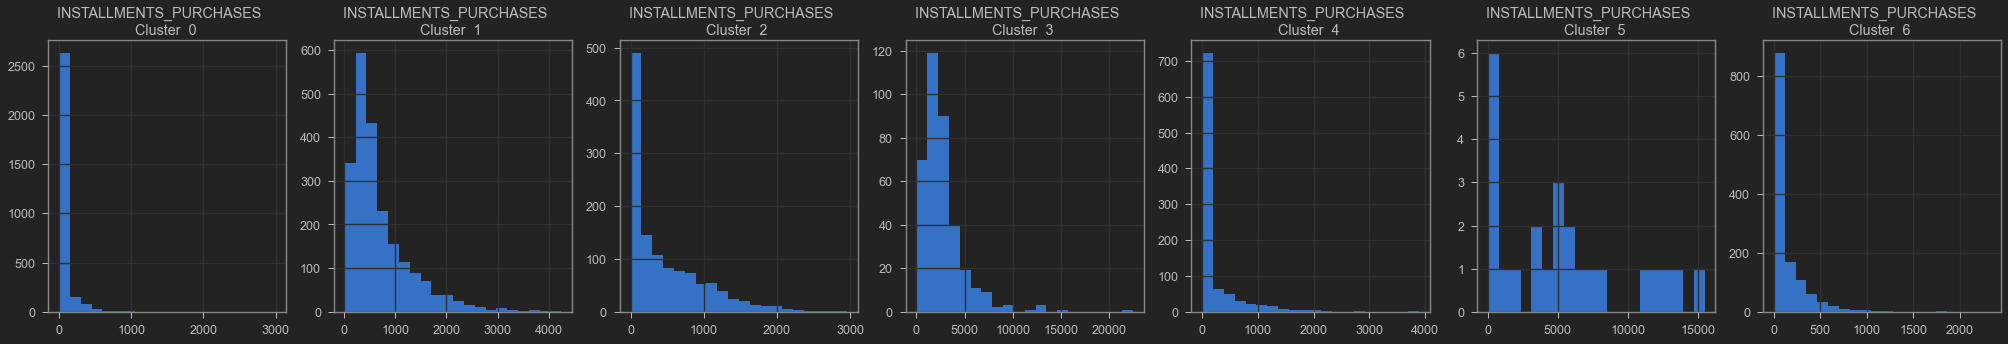

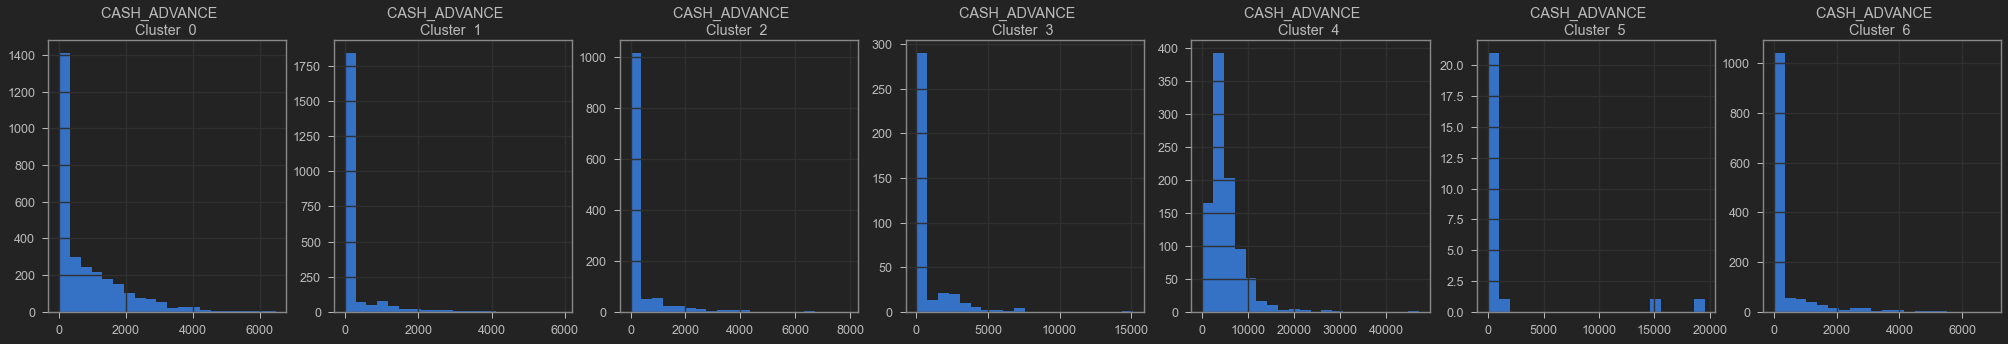

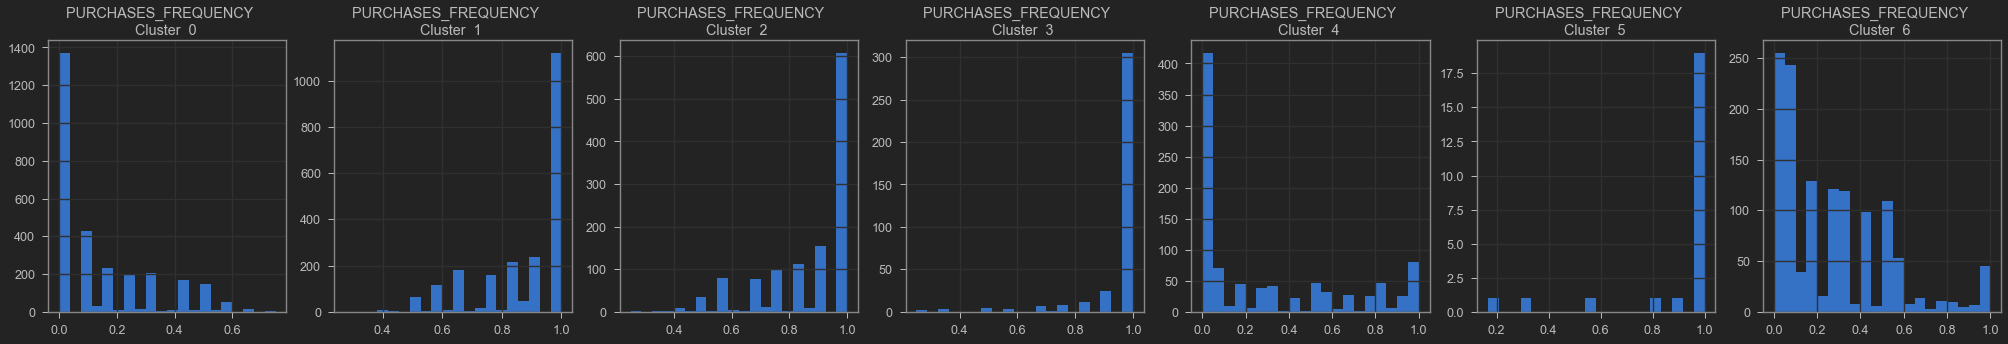

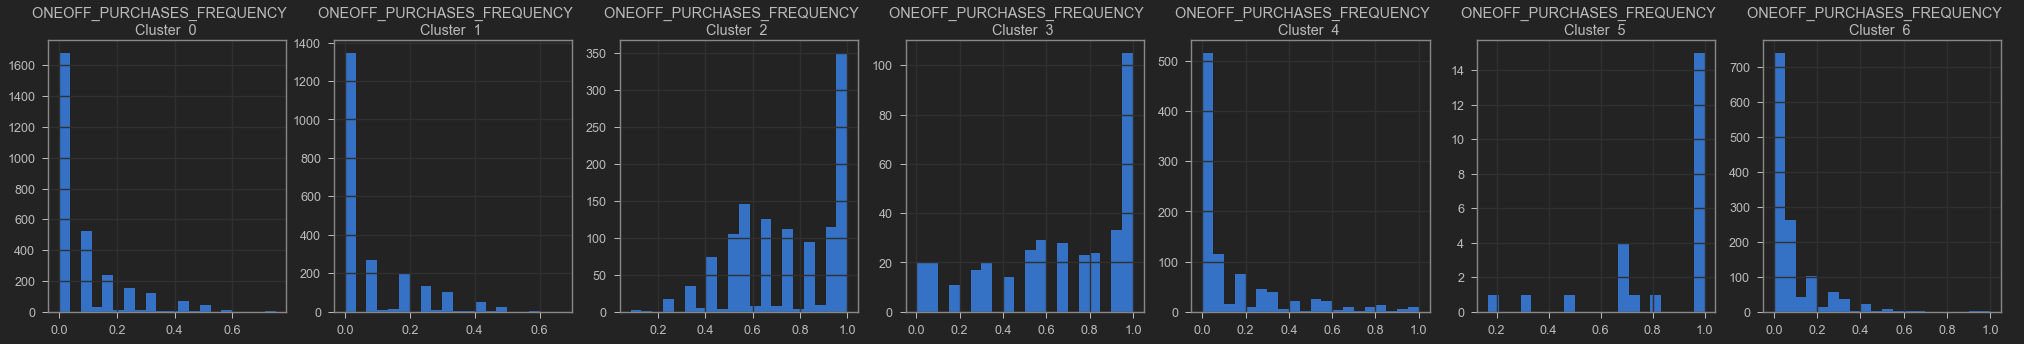

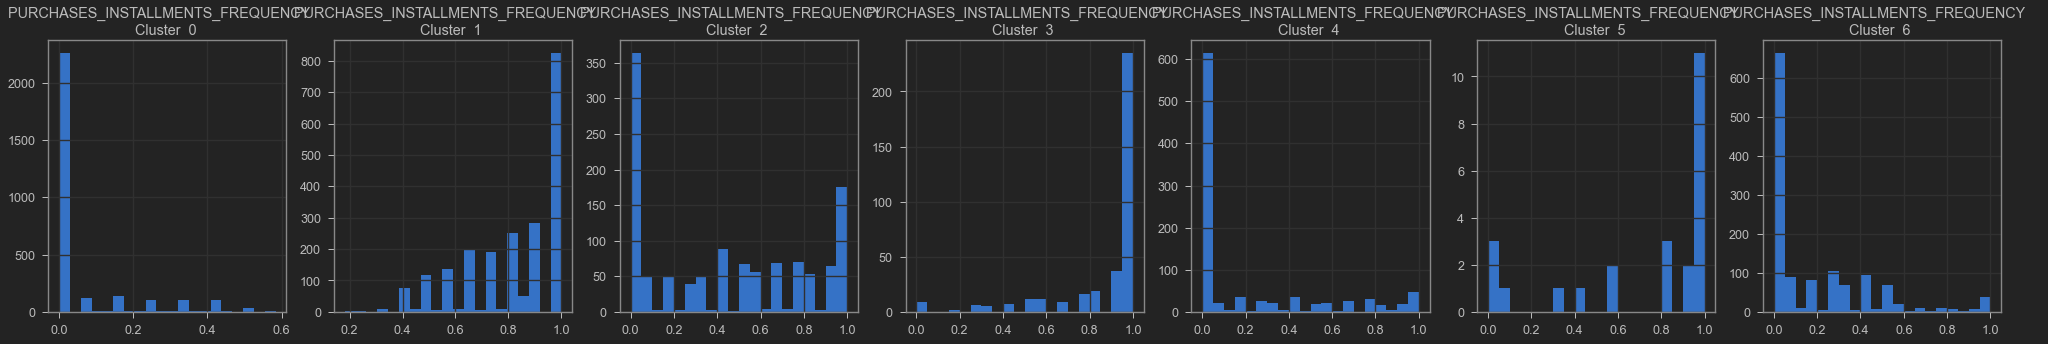

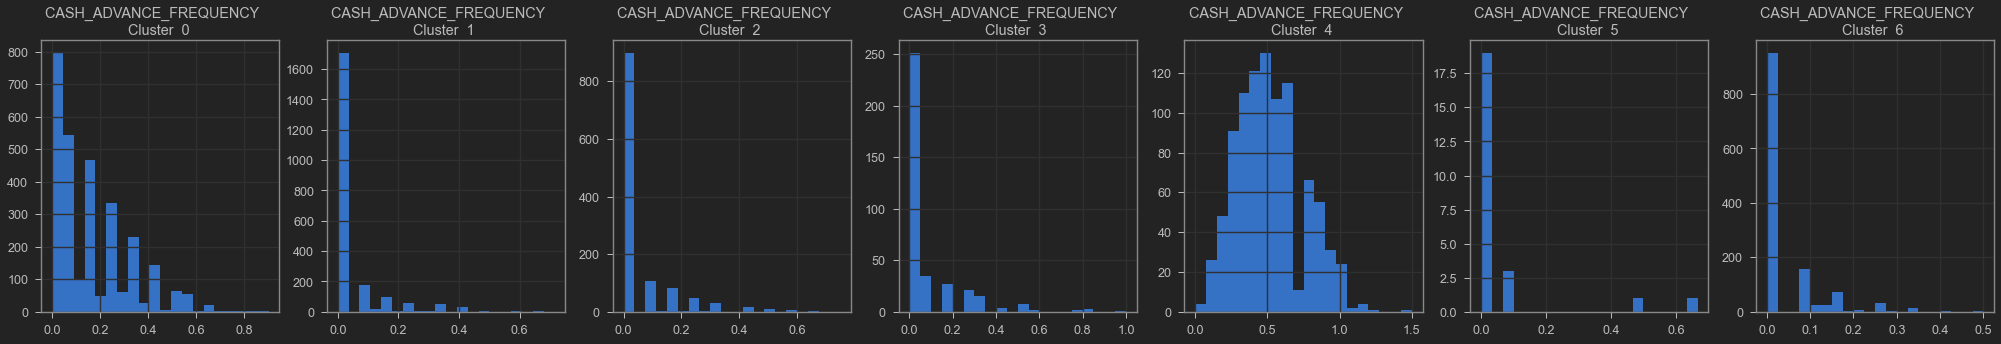

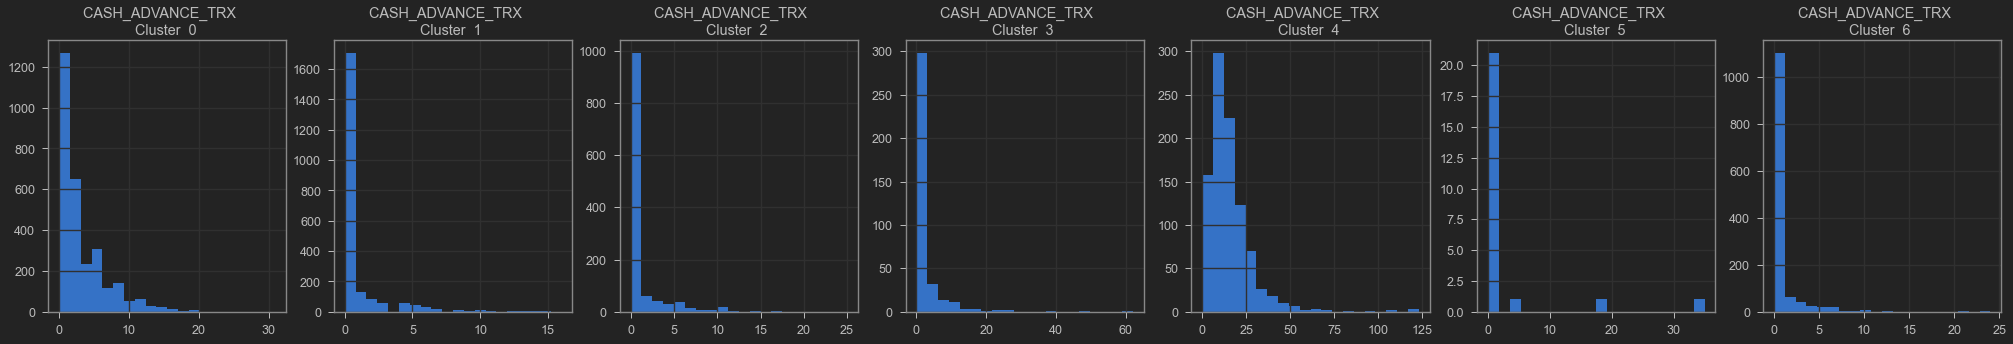

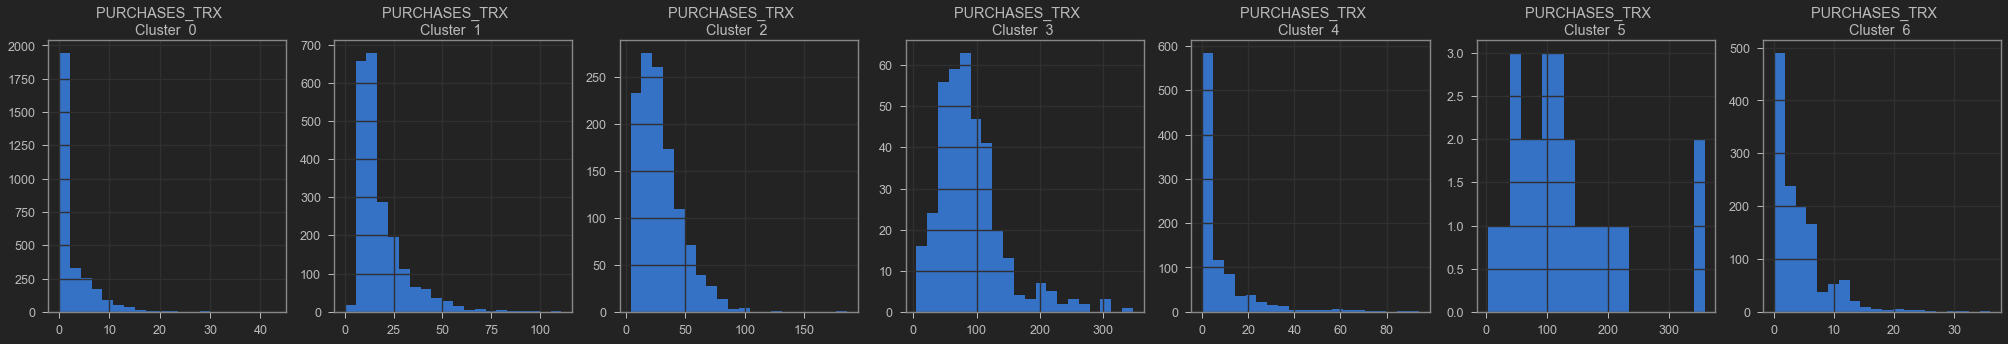

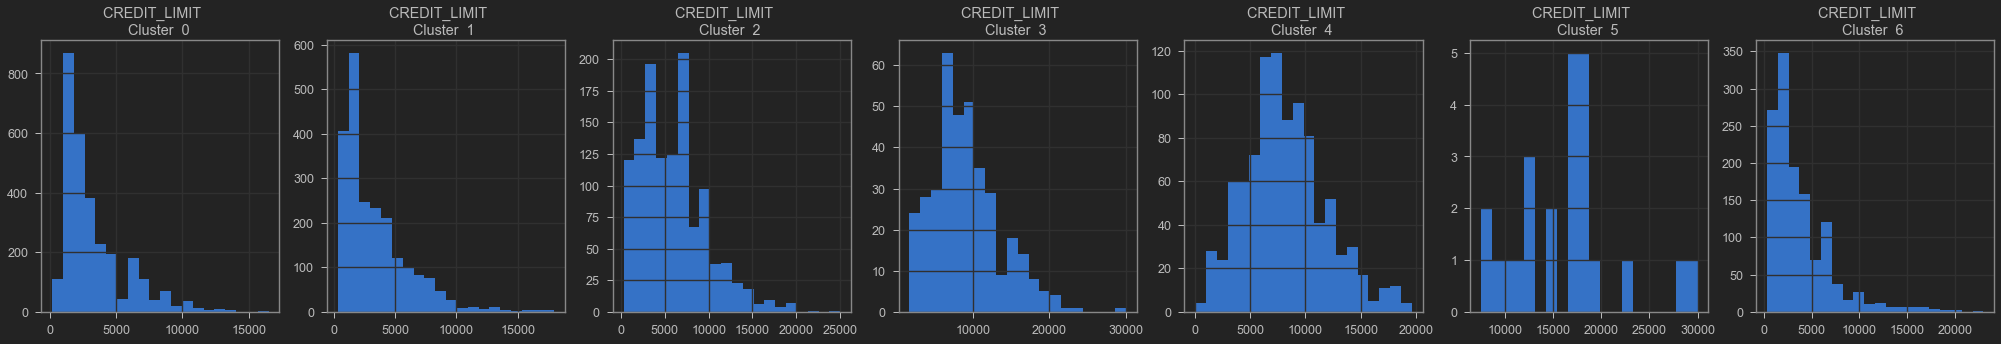

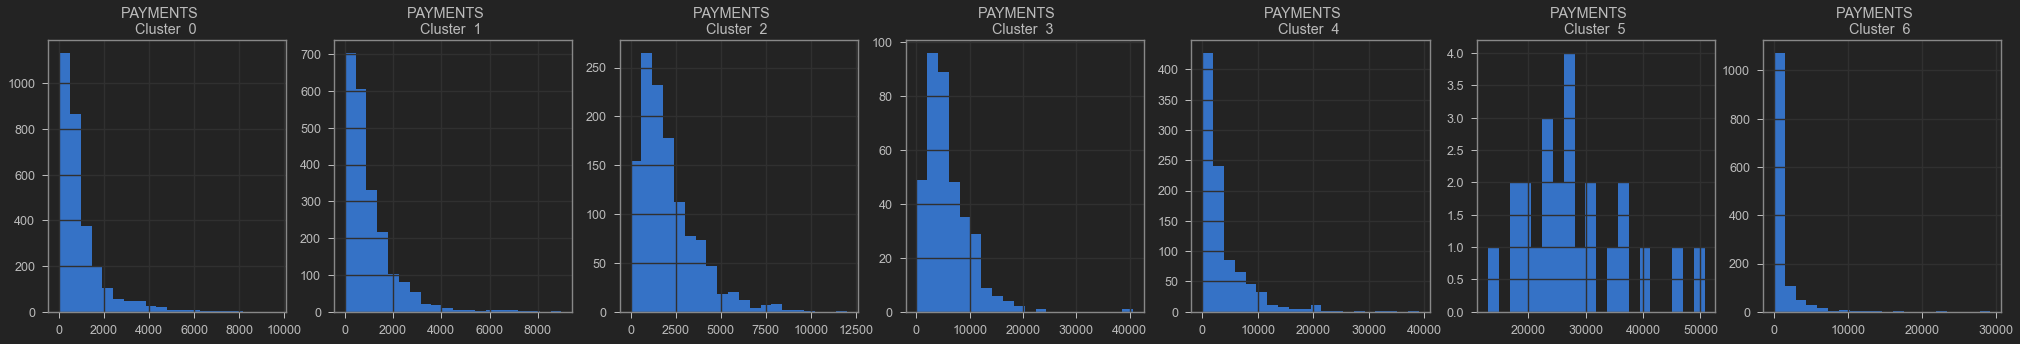

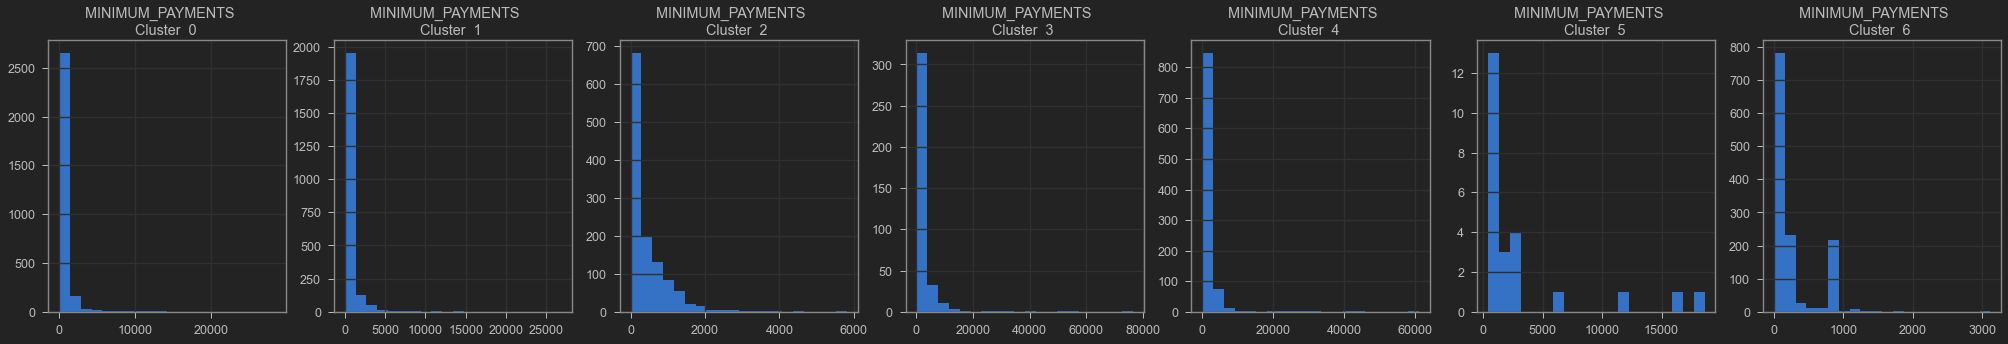

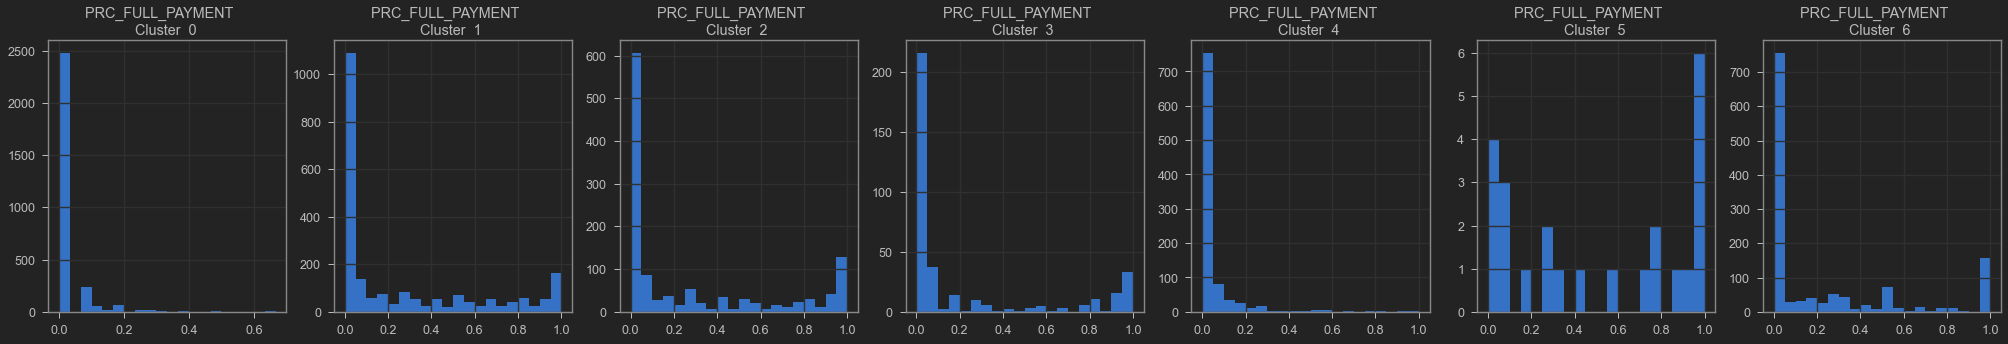

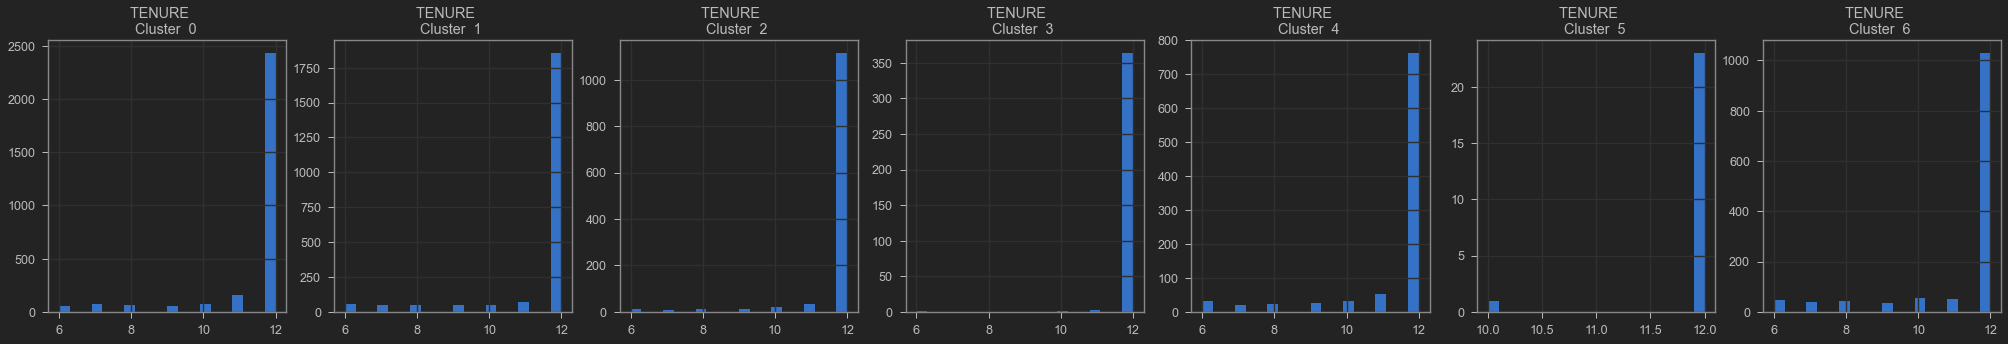

In [55]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=df_cluster[df_cluster['CLUSTER']==j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster  {} '.format(i,j))
    plt.show()

--

Now that we have achieved a clear visualizing of the relationship between our clusters, we can begin the application of Principal Components Analysis to our model.

## Application of Principal Components Analysis

Before we began this report, we had ran some experiments to determine the total variance between the principal components.

We discovered that a minimum of 6 principal components was required to achieve the minimum recommended 75% variance in our model.

Let us apply PCA using the 6 required components. We will show the variance contributions between the components very soon in this report.

In [56]:
pca=PCA(n_components=6)
pca.fit(df_scaled)

PCA(n_components=6)

In [57]:
scores=pca.transform(df_scaled)

scores_df=pd.DataFrame(scores,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060
...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380


In the above dataframe table, we have shown the scores provided for each of the 6 clusters in relation to every object in our dataset.

<i>Sidenote: As previously mentioned before, we have a grand total of 8950 objects in the dataset. The table reaches 8949 but with the automatic inclusion of object 0, all of the objects are truly present in this table</i>.

### Explaining the Variance

Let us now display the variance between each of the 6 PCA components. This will fully show the variance contributions and provide an explanation as to why we have selected 6 for the number of principal components included in our model algorithm.

In [58]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.27290037, 0.20301991, 0.08791979, 0.07479975, 0.06262792,
       0.05750211])

In [59]:
explained_variance=np.insert(explained_variance,0,0)

Inside of the array, we can see the variance shown for each component. They are shown in order from the 1st to the 6th component.

Now let us show the cumulative variance values to get a better insight on how they stack on each other. This will also prove that the 6 components will give us our 75% variance target.

In [60]:
cumulative_variance=np.cumsum(np.round(explained_variance,decimals=2))

We have just prepared the cumulative variance values.

Now let us combine these values with our Dataframe.

In [61]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6'], columns=['PC'])
explained_variance_df=pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df=pd.DataFrame(cumulative_variance, columns=['Cumulative Varaince'])

Now that the values have been combined with our Dataframe, we can display these cumulative variance values as a table. This is the part where we can see how the first 6 principal components can explain at least 75% of the variance in our model after dimension reduction.

In [62]:
df_explained_variance=pd.concat([pc_df,explained_variance_df,cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Varaince
0,,0.000000,0.00
1,PC1,0.272900,0.27
2,PC2,0.203020,0.47
3,PC3,0.087920,0.56
4,PC4,0.074800,0.63
5,PC5,0.062628,0.69
6,PC6,0.057502,0.75


We can see how the first 2 components are highly significant explaining a combined amount of approximately 47% of the variance.

The 3rd component is not nearly as significant as it explains approximately 8% of the variance. The component is still necessary though since it is only when we reach the 6th component that we hit a combined total of 75% of the variance explained.

--

Next let us utilize a scree plot to visualize the results of the explained variance between the principal components.

### Utilizing a Scree Plot

First we will import the required plotly library in python.

In [63]:
import plotly.express as px

Now we can generate the scree plot.

In [64]:
fig=px.bar(df_explained_variance,x='PC', y='Explained Variance', text='Explained Variance', width=800)
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

## Visualization of Major Components

Since Principal Component 1 and 2 are major components for explained variance, we have decided to show them both in a plane. This will allow us to plot them in a scatterplot, which will be an effective way to visualize the two major components which have a combined explained variance of approximately 47%.

### Visualizing Principal Components in a Plane

In [65]:
pca_df=pd.DataFrame(data=scores_df,columns=['PC1','PC2'])
pca_df.head()                                

,PC1,PC2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


We have now determined the scores for the first 2 components and are now able to move on with the creation of the scatter plot.

First we will have to concatenate these 2 principal components with the clusters created from K-Means against the objects in our dataset.

In [66]:
pca_df=pd.concat([pca_df,pd.DataFrame({'CLUSTER':labels})],axis=1)
pca_df.head()

,PC1,PC2,CLUSTER
0,-1.682220,-1.076451,0
1,-1.138295,2.506477,4
2,0.969684,-0.383520,2
3,-0.873628,0.043166,0
4,-1.599434,-0.688581,0


Now that we have achieved concatenation, let us plot the scatterplot to show the major components in a plane.

### Scatterplot for Clustering Major Components

<function matplotlib.pyplot.show(*args, **kw)>

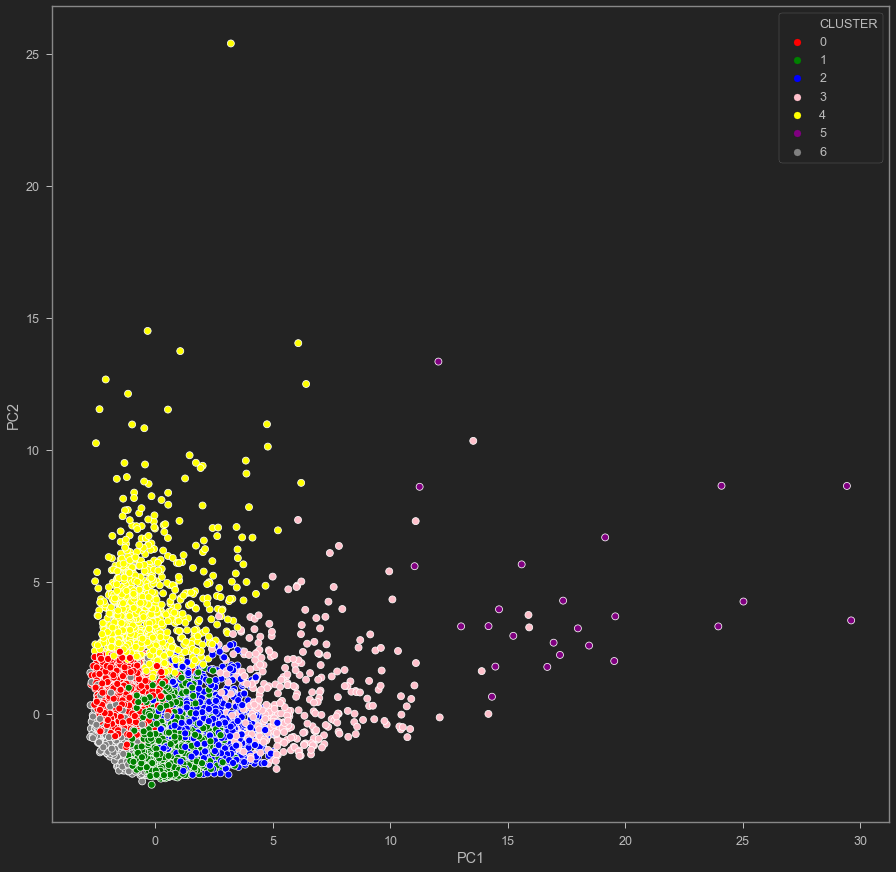

In [67]:
plt.figure(figsize=(15,15))
ax=sns.scatterplot(x="PC1",y="PC2",hue="CLUSTER", data=pca_df,palette=['red','green','blue','pink','yellow','purple','gray'])
plt.show

## Deployment

Since our objective for this <b>unsupervised machine learning model</b> has been to cluster the credit card customers into at least 3 distinctive groups, we have decided to use our 7 clusters to build our app. This will provide us with plenty of segmentation for the bank's marketing campaign.

The model itself has been effectively built with <b>7 clusters</b> and <b>6 principal components</b> for <i>segmentation</i>. This model will provide enough segmentation as previously mentioned and it will also provide enough explained variance. 

However we will only show <i>3 components</i> in the app. This has been decided in order for us to display our <i>7 clusters in a 3-D plot</i> for visualization. This will provide the bank with a clear visualization for the marketing campaign ad.

Lastly, we have also included 2 other plots alongside the 3-D plot. One to show the Explained Variance of all 6 components. Another to show the Total Explained Variance of all 6 components which. These 2 plots will compliment the 3-D plot very well since they will show the cumulative and non-cumulative variance explained through all 6 components, which is not shown in the 3-D plot.

<i>Sidenote: Explained Variance will show non-cumulative variance explained. Total Explained Variance will show cumulative variance explained.

## Performance Evaluation

What we have done well:

- [text]

What we could have done better:

- [text]


## Bibliography

<b>For Our Dataset</b> https://www.kaggle.com/arjunbhasin2013/ccdata 


<b>Market Segmentation Analysis</b>
https://en.wikipedia.org/wiki/Market_segmentation